In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option('max_colwidth', 800)

In [10]:
results = [file for file in os.listdir('/home/will/Downloads/results (2)/result') if 'result' in file]
df_list = []
for result in results:
    df = pd.read_csv('/home/will/Downloads/results (2)/result/'+result,na_values=0)
    df['file_name'] = result
    df_list.append(df)
df = pd.concat(df_list,ignore_index=True)#.fillna(1e4)

In [8]:
df.min()

reuse                                                  False
block              <class 'functions_refactor.NNConv_block'>
head            <class 'functions_refactor.SimpleHead_type'>
data                  ../Data/{}_data_ACSF_expand_PCA.pickle
batch_size                                                32
dim                                                      128
clip                                                       2
layer1                                                     2
layer2                                                     2
factor                                                     2
epochs                                                     1
train_type_0                                        -1.22825
train_type_1                                        -1.85938
train_type_2                                        -2.42031
train_type_3                                        -2.99712
train_type_4                                        -2.93778
train_type_5            

In [13]:
pd.isnull(df['type']).sum()

90

In [11]:
df['type'] = df.file_name.str.split('type_',expand=True)[1].str[0]

In [12]:
df = df.loc[np.logical_not(df.type.isnull())]

In [13]:
gb = df.groupby(['type','file_name'])

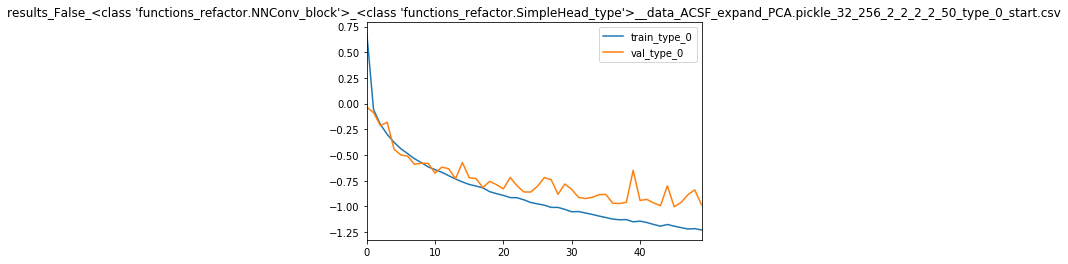

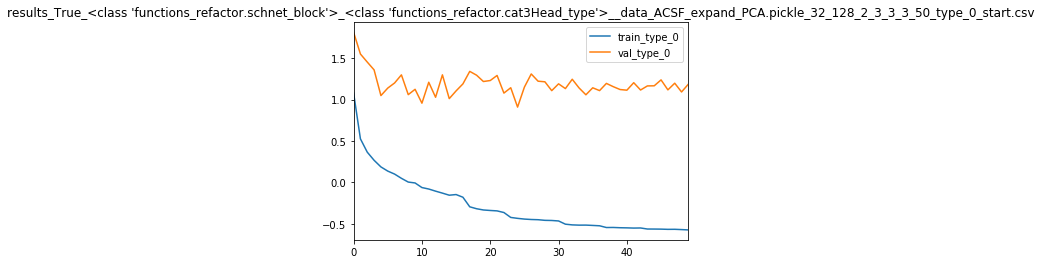

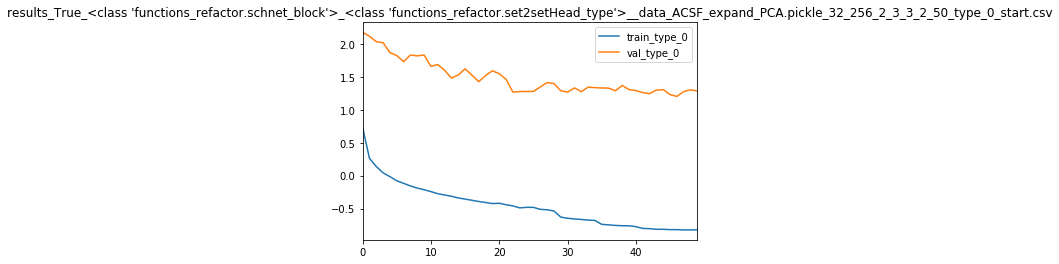

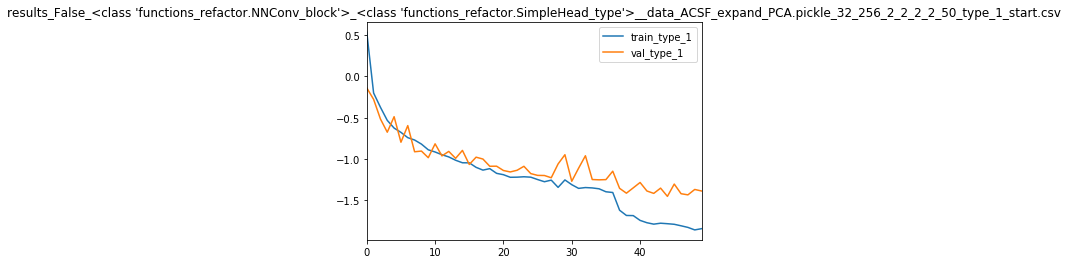

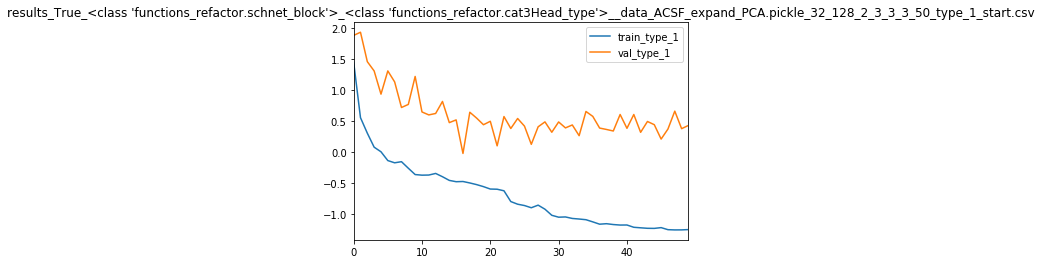

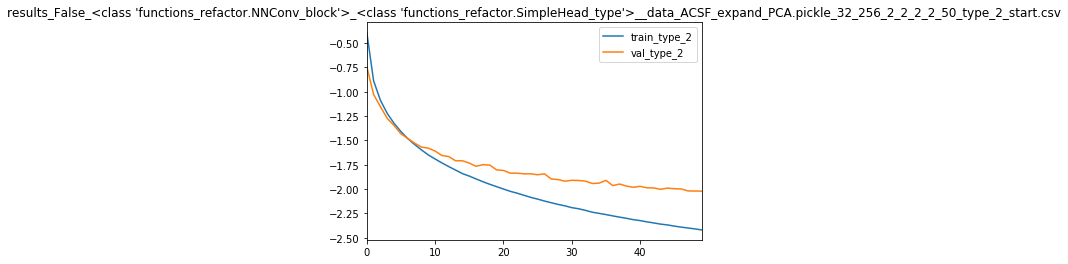

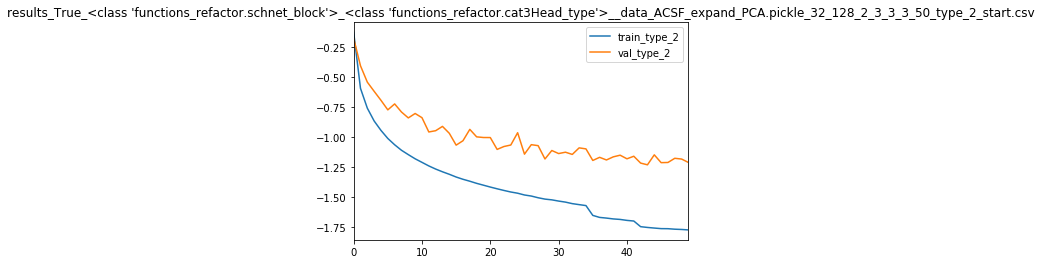

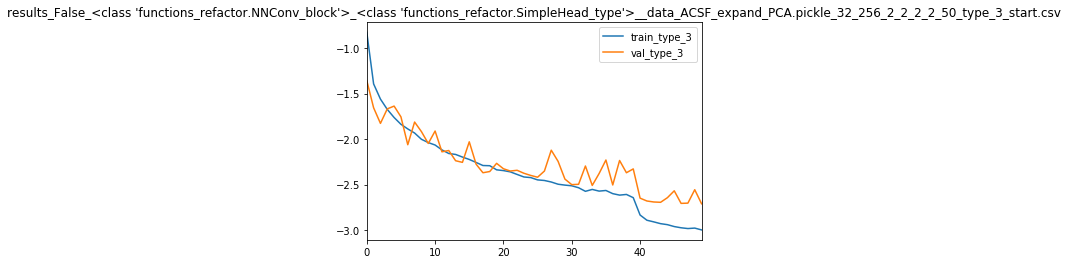

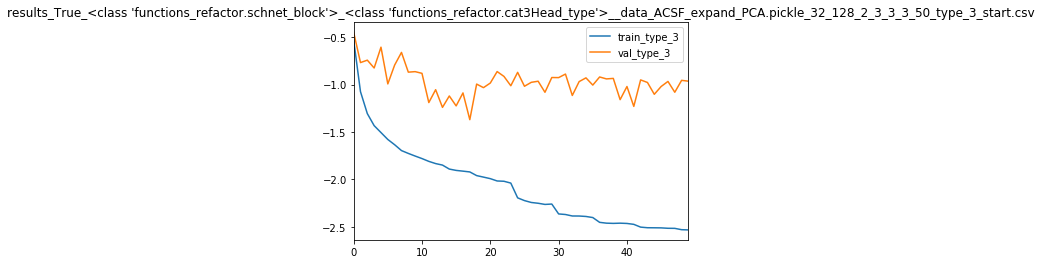

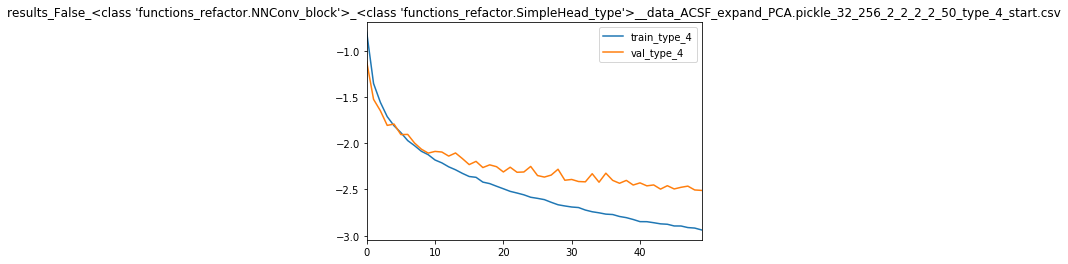

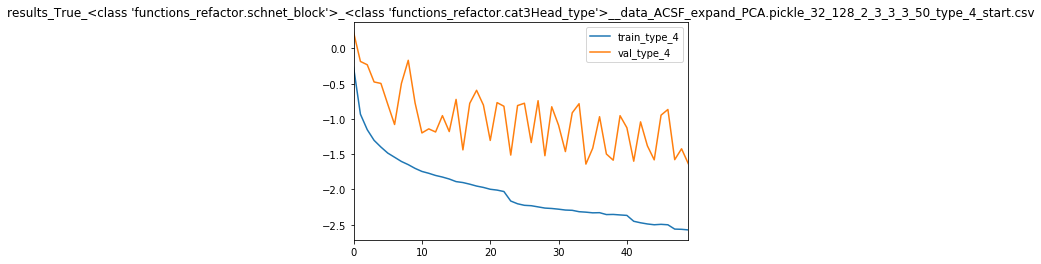

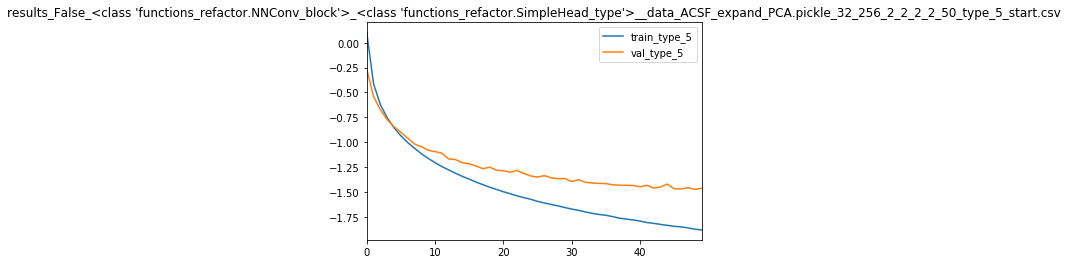

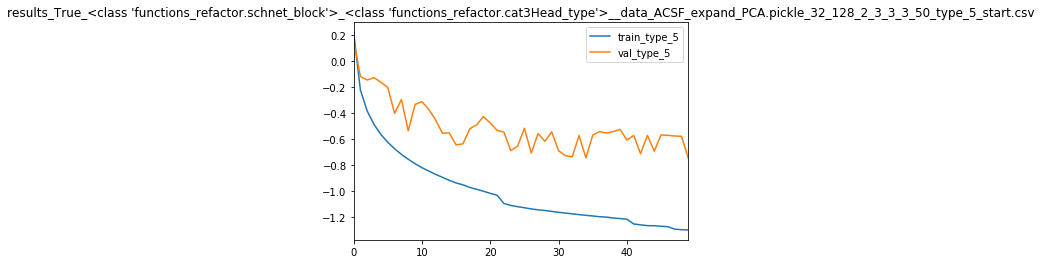

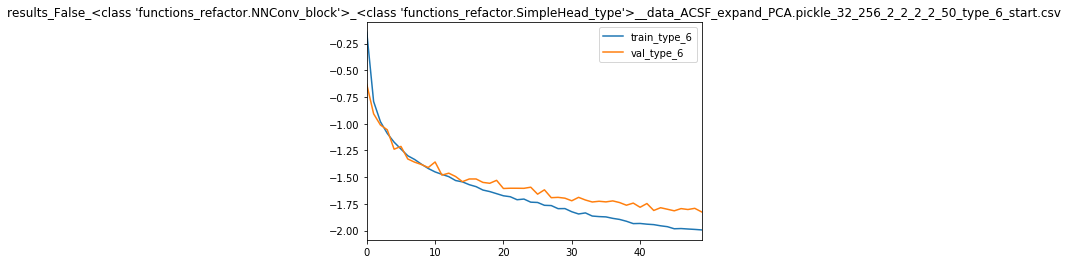

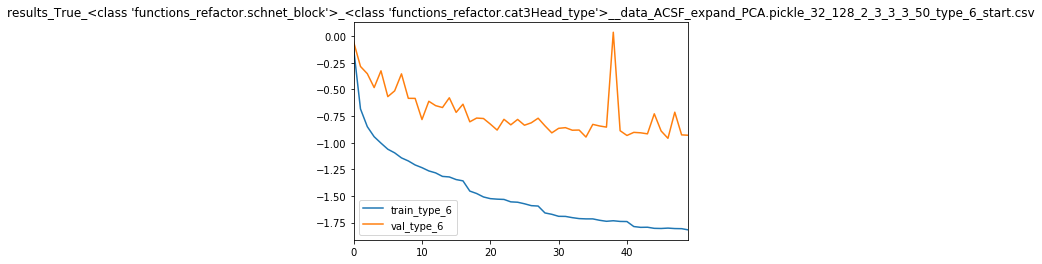

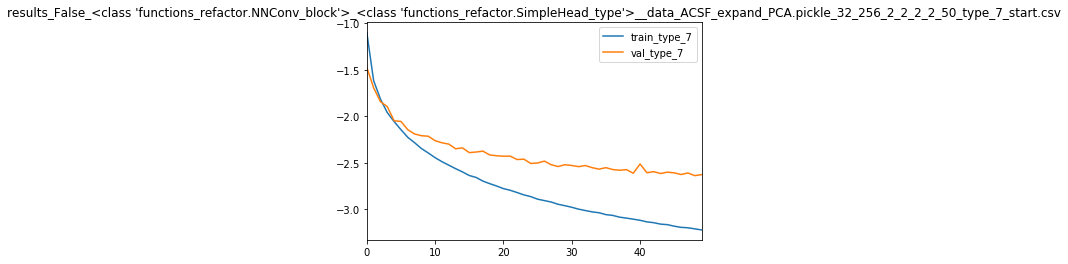

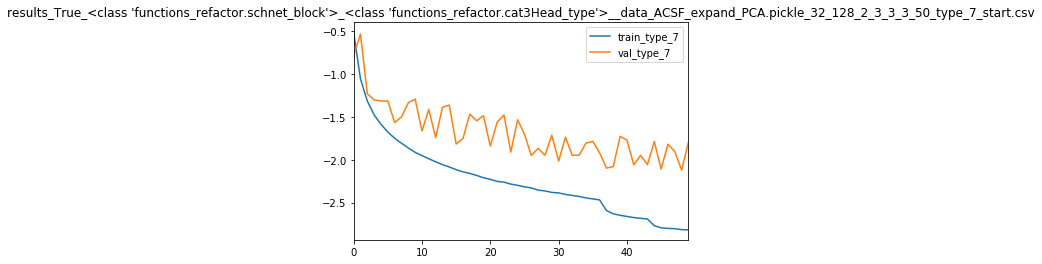

In [14]:
for name,group in gb:
    group[['train_type_'+name[0],'val_type_'+name[0]]].reset_index(drop=True).plot(title=name[1])
    plt.show()